SAS & HSE, Applied Time Series Forecasitng , Winter 2022 

<font color="blue"> HW #2 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму: https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл Surname_w2022_23_hw2.ipynb, например, ivanov_w2022_23_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadline**: <font color="red"> 10-Jan-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(3,max(0,(10-ДнейПослеДедлайна/7))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже: 

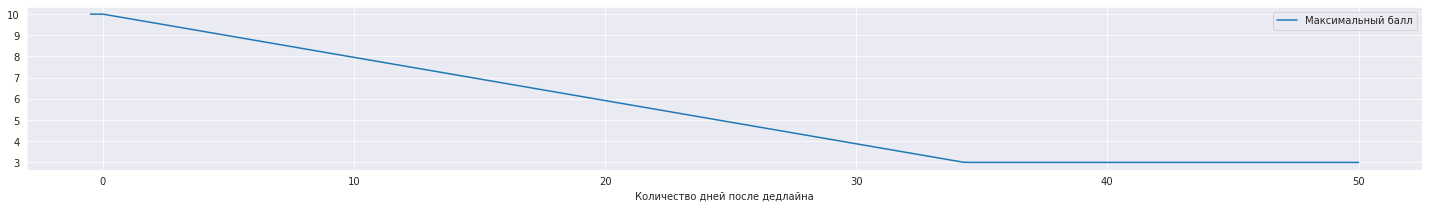

In [2]:
import math

import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(0.3, (1-x/49)))] for x in np.linspace(-0.5,50,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=1)$,
    - <Answer>
        $$(1 - B)^k(y_t - \mu) = \varepsilon_t + \theta_1\varepsilon_{t-1}$$
        $$(1 - B)^k(y_t - \mu) = (\sum_{j=0}^{k} C_{k}^j (-B)^j) (y_t - \mu) = y_t - \mu + \sum_{j=1}^{k} C_{k}^j (-1)^j y_{t-j}$$
 <br></br>
        $$y_t = \mu + \sum_{j=1}^{k} C_{k}^j (-1)^{j-1} y_{t-j} + \varepsilon_t + \theta_1\varepsilon_{t-1}$$
 - 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,   
     - <Answer>
          $$(1-B)^{k+1}(1-B^s) (y_t - \mu) = \varepsilon_t + \theta_1\varepsilon_{t-1} + \delta_1 y_{t-1}$$
          $$ (1-B^s) (y_t - \mu) = y_t - \mu - B^s y_t + B^s \mu = y_t -\mu -y_{t-s}$$
          $$(1-B)^{k+1}(1-B^s)(y_t - \mu) = (\sum_{j=0}^{k+1} C_{k+1}^j (-B)^j)(y_t -\mu -y_{t-s}) = y_t - \mu + \sum_{j=1}^{k+1} C_{k+1}^j (-1)^j y_{t-j} -
               y_{t-s} - \sum_{j=1}^{k+1} C_{k+1}^j (-1)^j y_{t-s-j} =  y_t - \mu - y_{t-s} + \sum_{j=1}^{k+1} C_{k+1}^j (-1)^j ( y_{t-j} - y_{t-s-j})$$
<br></br>
        $$y_t = \mu + y_{t-s} + \sum_{j=1}^{k+1} C_{k+1}^j (-1)^{j-1} (y_{t-j} - y_{t-s-j})  + \varepsilon_t + \theta_1\varepsilon_{t-1}  + \delta_1 y_{t-1}$$
    <br></br>


<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (15%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> 
  
  description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "TS" in column O

* 1) plot target ts 
* 2) plot cros-series plot: independent variables and target variable on the same subplot 
* 3) answer the questions: 
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion? 
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed). 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 8].drop(columns='id').set_index('Date')['2011-01-01':'2014-01-01']
del df

ts.drop(['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp2_South_Less', 'Temp3_South_Less', 'Temp4_South_Less', 'Temp2_South_Gr', 'Temp3_South_Gr', 'Temp4_South_Gr',], axis=1, inplace=True)

display(ts.describe(include='all'))
display(ts.head())

,EnergyConsumption,Saturday,Sunday,Temp1_South_Less,Temp1_South_Gr
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,14610.171863,0.139471,0.182315,12.469098,27.037830
std,3767.887090,0.346596,0.386280,9.856960,0.273228
min,9635.919000,0.000000,0.000000,-20.000000,27.000000
25%,11164.769000,0.000000,0.000000,4.100000,27.000000
50%,13733.882000,0.000000,0.000000,13.400000,27.000000
75%,18431.489000,0.000000,0.000000,21.200000,27.000000
max,23160.590000,1.000000,1.000000,27.000000,30.700000


,EnergyConsumption,Saturday,Sunday,Temp1_South_Less,Temp1_South_Gr
Date,,,,,
2011-01-01,16577.000,1.0,0.0,4.4,27.0
2011-01-02,16430.805,0.0,1.0,3.7,27.0
2011-01-03,16294.421,0.0,1.0,7.0,27.0
2011-01-04,16346.913,0.0,1.0,5.8,27.0
2011-01-05,16383.799,0.0,1.0,5.4,27.0


In [4]:
def cross_plot(ts_interval):
    # Plot the TS together with independent variables
    fig, ax = plt.subplots(figsize=[30,10])
    ax2, ax3 = ax.twinx(), ax.twinx()
    ax2.set_ylabel('Holidays')
    ax3.set_ylabel('Temperature')
    rspine = ax3.spines['right']
    rspine.set_position(('axes', 1.05))
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    fig.subplots_adjust(right=0.75)

    ts_interval['EnergyConsumption'].plot(ax = ax,  style='b-')
    ts_interval[['Saturday', 'Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

    for col in ts.columns:
        if col.startswith('Temp'):
            style = '--' if col.endswith('Less') else '-.'
            ts_interval[col].plot(ax = ax3,  style=style)

    lines = ax.get_lines() + ax3.get_lines()
    ax.legend(lines, [l.get_label() for l in lines], loc='lower right', ncol=3)
    ax2.legend(loc='upper left')
    plt.show()

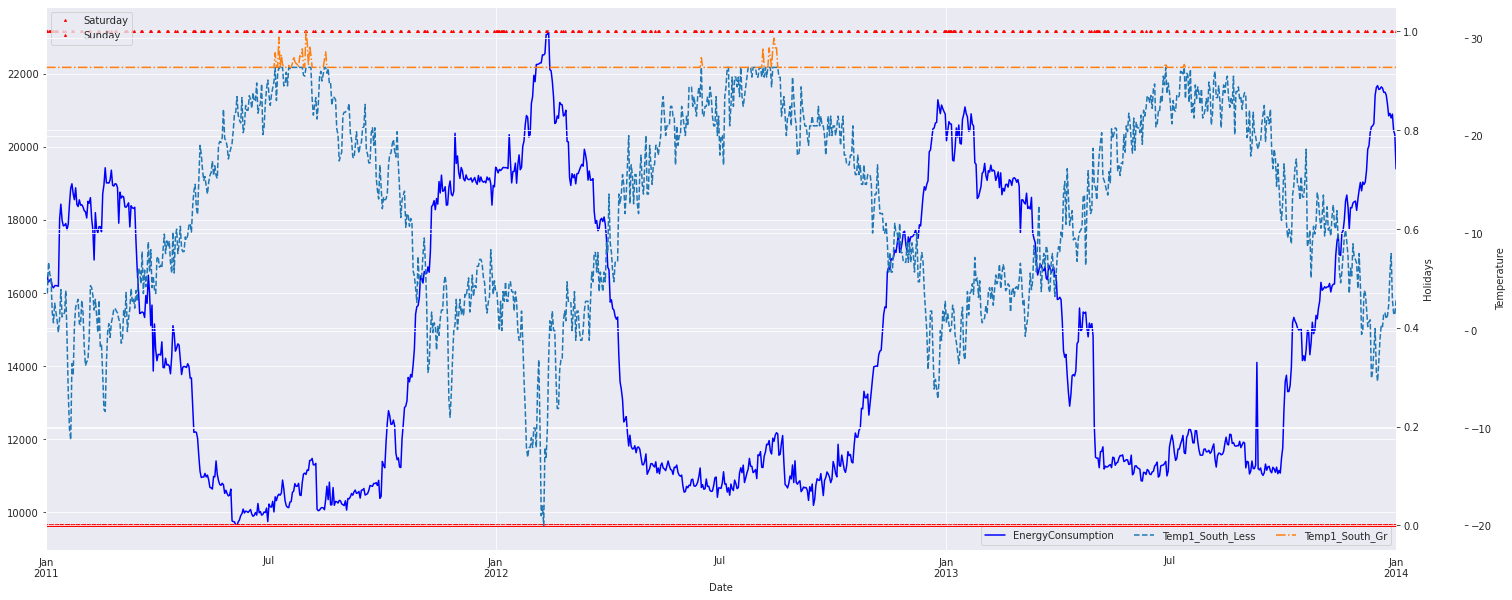

In [5]:
cross_plot(ts)

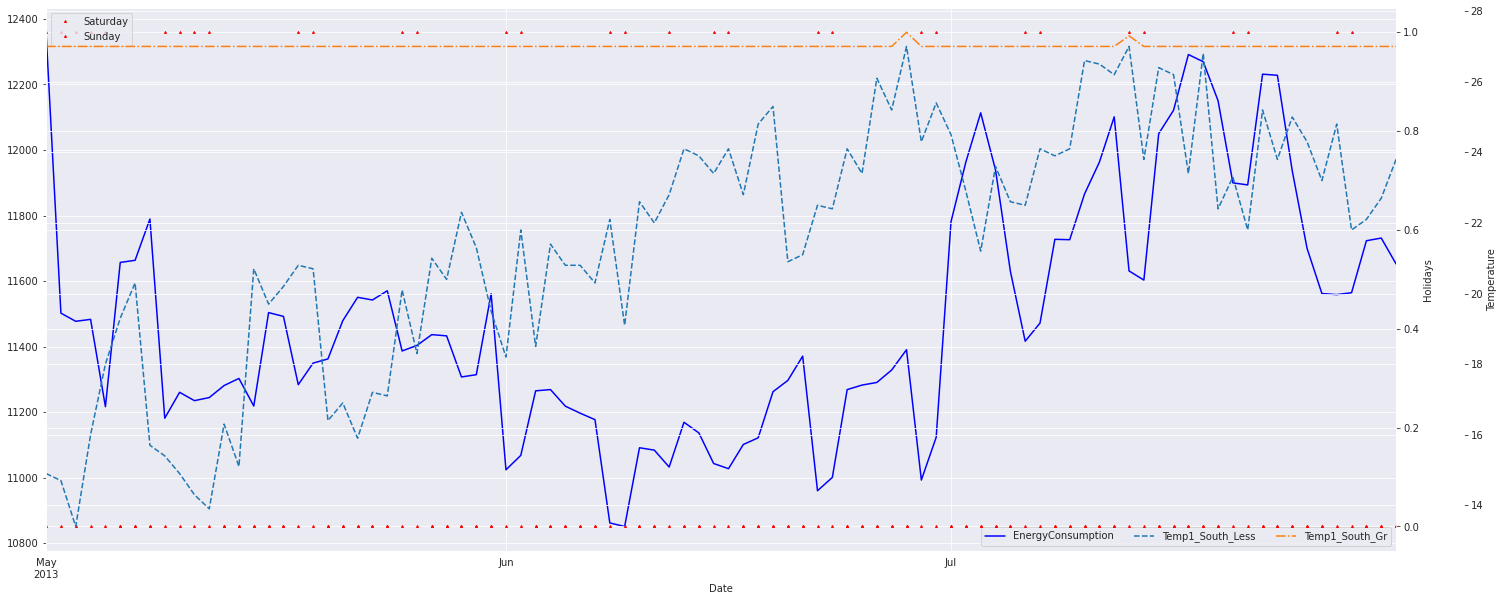

In [6]:
cross_plot(ts.loc['2013-05':'2013-07'])

###Answers
1. trend: minimal energy consumption (during summer) is increasing, temperatures are increasing.
2. seasonality: annual and weekly seasonality (minimums during summer and weekends)
3. no visible variance instability

To make the TS stationary
* trend differentiation with shift 1,
* two seasonal differentiations with shifts 7 and 365,
* Box-Cox transformation is not needed

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually ** 

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively: 
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q) 
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for 
    - unbiasedness, 
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)

In [7]:
split_idx = int(len(ts) * 0.8)
ts1 = ts.iloc[:split_idx]
ts2 = ts.iloc[split_idx:]

 1) apply transformation to make the ts1 stationary;

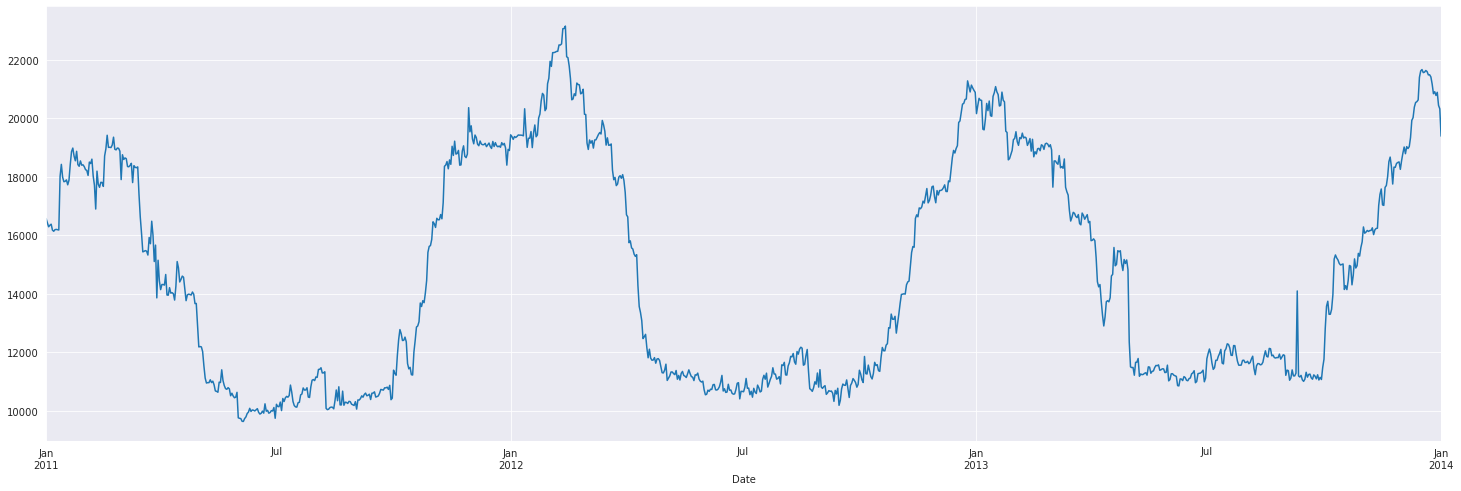

In [8]:
ts['EnergyConsumption'].plot(figsize=(25,8))
plt.show()

In [9]:
def dif_ts(ts_to_dif, shift):
    return (ts_to_dif - ts_to_dif.shift(shift)).iloc[shift:]

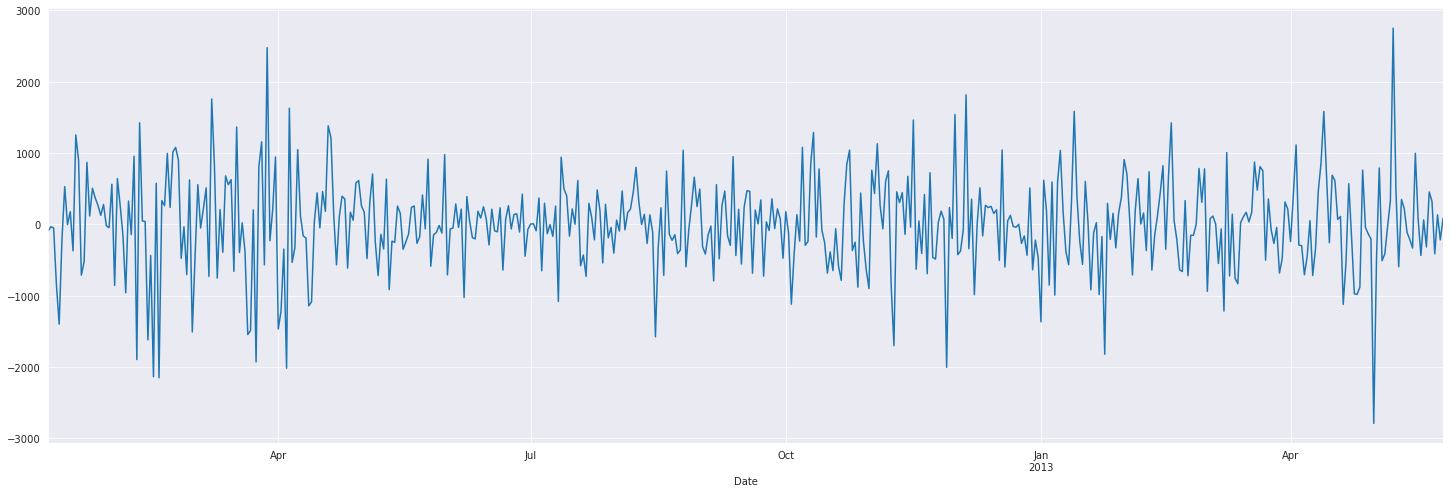

In [10]:
# seasonal differencing 1, 2, trend dif
ts1_diff = dif_ts(dif_ts(dif_ts(ts1, 365), 7), 1)
ts1_diff['EnergyConsumption'].plot(figsize=(25,8))
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa import stattools

def print_test_results(test_name: str, result: []):
    tab_vals = ''
    tab_vals_ind = 0
    if test_name == 'KPSS':
        tab_vals = 'table distribution'
        tab_vals_ind = 3
    elif test_name == 'ADF':
        tab_vals = 'critical values'
        tab_vals_ind = 4
    print('The %s test statistic %f    pvalue: %.2f   maximal Lag: %i   %s: %s' %
          (test_name, result[0], result[1], result[2], tab_vals, result[tab_vals_ind]))
    if (((test_name == 'ADF') & (result[1] <= 0.05) & (result[tab_vals_ind]['5%'] > result[0]))
        | ((test_name == 'KPSS') & (result[1] > 0.05) & (result[tab_vals_ind]['5%'] > result[0]))):
        print("\u001b[32m%s: stationary\u001b[0m" % test_name)
    else:
        print("\x1b[31m%s: non-stationary\x1b[0m" % test_name)


def check_stationarity_dick_fuller(ts_values):
    result = adfuller(ts_values)
    print_test_results("ADF", result)

def check_stationarity_kpss(ts_values):
    result = kpss(ts_values)
    print_test_results("KPSS", result)

def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,10])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

In [12]:
check_stationarity_dick_fuller(ts1_diff['EnergyConsumption'].values)
check_stationarity_kpss(ts1_diff['EnergyConsumption'].values)

The ADF test statistic -8.426570    pvalue: 0.00   maximal Lag: 15   critical values: {'1%': -3.4438213751870337, '5%': -2.867480869596464, '10%': -2.5699342544006987}
ADF: stationary
The KPSS test statistic 0.007603    pvalue: 0.10   maximal Lag: 0   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: stationary


/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


2) define exogenous variables and apply the transformations to them, if needed

In [13]:
endog = ts1_diff['EnergyConsumption']
exogs = ts1_diff.drop(columns=['EnergyConsumption'])

3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);

In [14]:
arima_order_000 = sm.tsa.ARIMA(endog=endog, order=[0,0,0], exog=exogs).fit()
arima_order_000.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      EnergyConsumption   No. Observations:                  504
Model:                          ARIMA   Log Likelihood               -3975.890
Date:                Sun, 22 Jan 2023   AIC                           7963.780
Time:                        18:27:39   BIC                           7989.116
Sample:                    01-09-2012   HQIC                          7973.718
                         - 05-26-2013                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4903     28.934     -0.017      0.986     -57.200      56.220
Saturday            71.8048    266.043      0.270      0.787    -449.630     593.240
Sunday            -107.4125     58.122     -1.848      0.065    -221.329       6.504
Temp1_South_Less   -25.5886      6.450     -3.967      0.000     -38.230     -12.947
Temp1_South_Gr       5.7970     77.638      0.075      0.940    -146.371     157.965
sigma2            4.165e+05   1.94e+04     21.434      0.000    3.78e+05    4.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                71.28
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.13
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


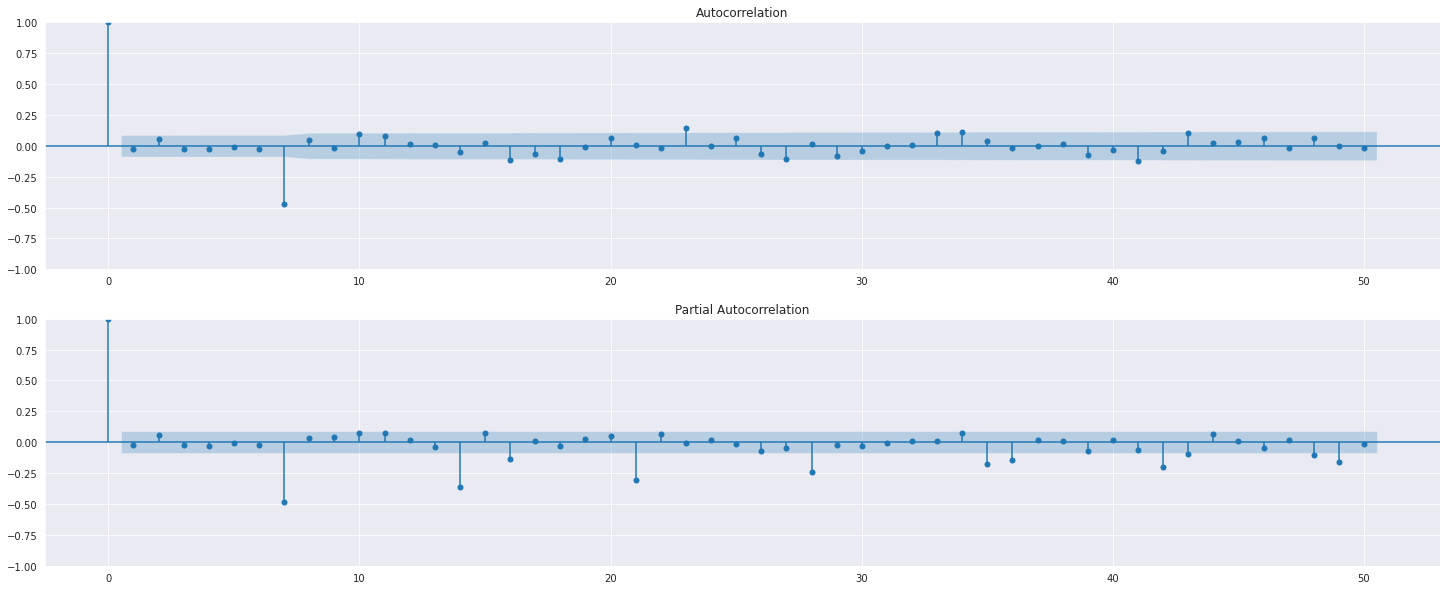

In [15]:
plot_acf_pacf(arima_order_000, lags=50)

### Conclusion:
Analysis of ACF and PACF for ARIMA(0,0,0) suggests the following parameter candidate values:
* q = {0}
* Q = {0,1}
* p = {0}
* P = {0,1..7} s=7

But actually as PACF is decreasing with period 7 and the is only one ACF peak = period 7, the most probable model is (0,0,0)(0,0,1,7)

5) select the best parameters of the ARIMA models iteratively:
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q)
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

In [16]:
arima_order_000_1_700_1 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[(1,2,3,4,5,6,7),0,(0,1),7], exog=exogs).fit(disp=0)
arima_order_000_1_700_1.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(7, 0, [2], 7)   Log Likelihood               -3806.682
Date:                   Sun, 22 Jan 2023   AIC                           7639.364
Time:                           18:28:06   BIC                           7694.258
Sample:                       01-09-2012   HQIC                          7660.897
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Saturday            69.9998    251.882      0.278      0.781    -423.679     563.679
Sunday            -111.0734     72.864     -1.524      0.127    -253.883      31.737
Temp1_South_Less   -24.6009      5.916     -4.158      0.000     -36.196     -13.006
Temp1_South_Gr       4.8633     24.525      0.198      0.843     -43.205      52.931
ar.S.L7             -1.0237      0.046    -22.023      0.000      -1.115      -0.933
ar.S.L14            -0.0962      0.065     -1.487      0.137      -0.223       0.031
ar.S.L21            -0.1002      0.072     -1.392      0.164      -0.241       0.041
ar.S.L28            -0.0231      0.073     -0.316      0.752      -0.167       0.120
ar.S.L35             0.0306      0.072      0.424      0.672      -0.111       0.172
ar.S.L42            -0.0168      0.065     -0.258      0.796      -0.144       0.111
ar.S.L49            -0.0428      0.052     -0.825      0.409      -0.144       0.059
ma.S.L14            -0.9998      0.068    -14.651      0.000      -1.134      -0.866
sigma2            1.993e+05      0.001   1.49e+08      0.000    1.99e+05    1.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               269.21
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.68
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.5e+26. Standard errors may be unstable.
"""

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


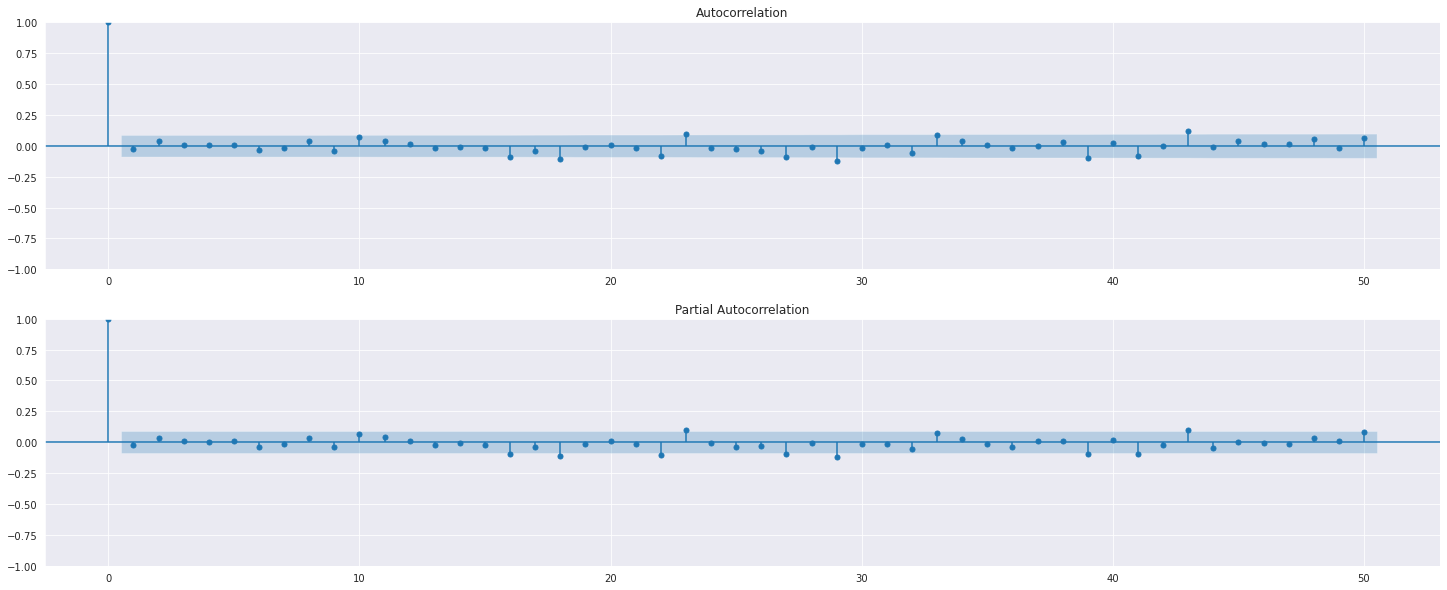

In [17]:
plot_acf_pacf(arima_order_000_1_700_1, lags=50)

In [18]:
arima_order_000_101 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[1,0,1,7], exog=exogs).fit(disp=0)
arima_order_000_101.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -3808.088
Date:                   Sun, 22 Jan 2023   AIC                           7630.176
Time:                           18:28:07   BIC                           7659.734
Sample:                       01-09-2012   HQIC                          7641.771
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Saturday            38.2569    275.215      0.139      0.889    -501.154     577.668
Sunday            -185.6994     66.087     -2.810      0.005    -315.227     -56.172
Temp1_South_Less   -24.6871      5.784     -4.268      0.000     -36.024     -13.350
Temp1_South_Gr      -4.4270     74.225     -0.060      0.952    -149.905     141.051
ar.S.L7             -0.0242      0.047     -0.512      0.609      -0.117       0.068
ma.S.L7             -0.9996      1.796     -0.556      0.578      -4.521       2.521
sigma2            2.015e+05    3.6e+05      0.560      0.576   -5.04e+05    9.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               258.33
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.68
Prob(H) (two-sided):                  0.55   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


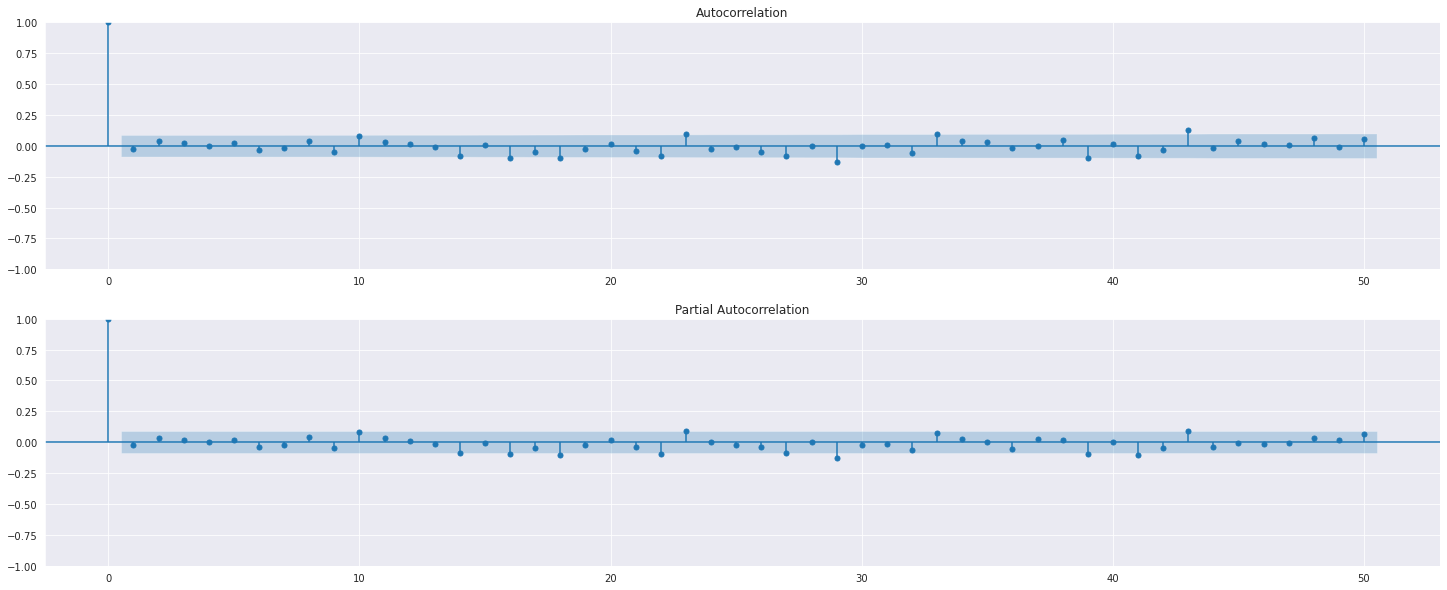

In [19]:
plot_acf_pacf(arima_order_000_101, lags=50)

In [20]:
arima_order_000_001 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[0,0,1,7], exog=exogs).fit(disp=0)
arima_order_000_001.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -3808.151
Date:                   Sun, 22 Jan 2023   AIC                           7628.302
Time:                           18:28:08   BIC                           7653.638
Sample:                       01-09-2012   HQIC                          7638.240
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Saturday            19.4030    282.695      0.069      0.945    -534.669     573.475
Sunday            -188.1211     64.311     -2.925      0.003    -314.169     -62.074
Temp1_South_Less   -24.8493      5.767     -4.309      0.000     -36.153     -13.545
Temp1_South_Gr       0.9218     74.002      0.012      0.990    -144.119     145.963
ma.S.L7             -0.9995      1.432     -0.698      0.485      -3.807       1.808
sigma2            2.014e+05   2.87e+05      0.702      0.483   -3.61e+05    7.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               259.19
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.68
Prob(H) (two-sided):                  0.50   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


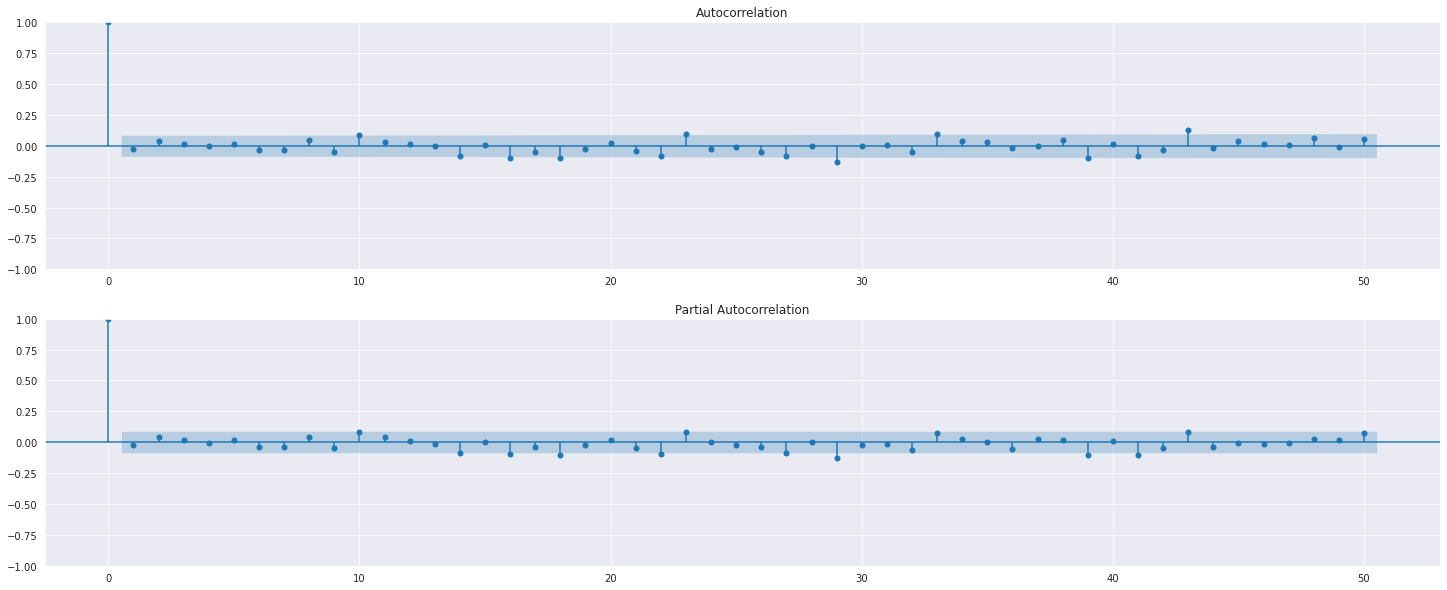

In [21]:
plot_acf_pacf(arima_order_000_001, lags=50)

In [22]:
arima_order_000_700 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[7,0,0,7], exog=exogs).fit(disp=0)
arima_order_000_700.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:       EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(7, 0, 0, 7)   Log Likelihood               -3827.286
Date:                 Sun, 22 Jan 2023   AIC                           7678.571
Time:                         18:28:17   BIC                           7729.242
Sample:                     01-09-2012   HQIC                          7698.447
                          - 05-26-2013                                         
Covariance Type:                   opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Saturday            71.5125    205.090      0.349      0.727    -330.456     473.481
Sunday            -108.1470     67.403     -1.604      0.109    -240.255      23.961
Temp1_South_Less   -28.1076      5.789     -4.855      0.000     -39.455     -16.761
Temp1_South_Gr       5.6279     73.394      0.077      0.939    -138.221     149.477
ar.S.L7             -0.8935      0.045    -19.685      0.000      -0.982      -0.805
ar.S.L14            -0.8344      0.056    -14.993      0.000      -0.943      -0.725
ar.S.L21            -0.7195      0.068    -10.537      0.000      -0.853      -0.586
ar.S.L28            -0.5659      0.069     -8.224      0.000      -0.701      -0.431
ar.S.L35            -0.3886      0.069     -5.629      0.000      -0.524      -0.253
ar.S.L42            -0.2819      0.062     -4.560      0.000      -0.403      -0.161
ar.S.L49            -0.1503      0.046     -3.284      0.001      -0.240      -0.061
sigma2            2.214e+05   1.08e+04     20.501      0.000       2e+05    2.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):               253.93
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.71
Prob(H) (two-sided):                  0.86   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


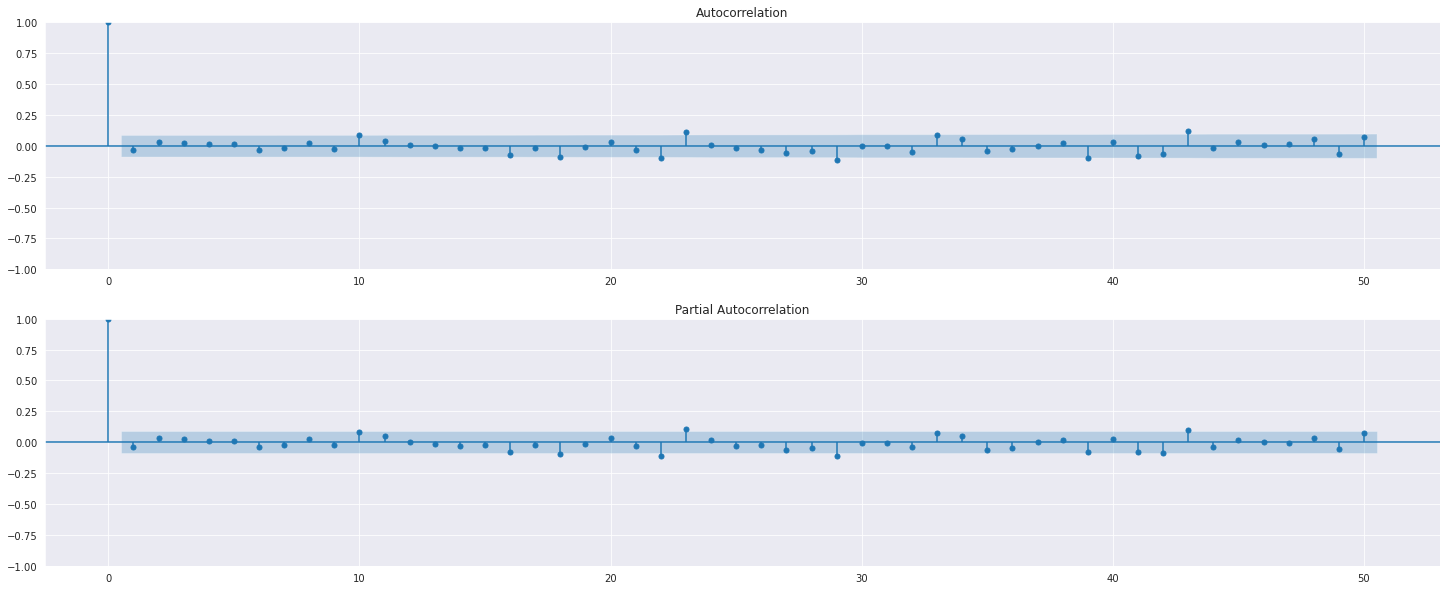

In [23]:
plot_acf_pacf(arima_order_000_700, lags=50)

### Conclusion:
The best ARIMA model is (0,0,0)(0,0,1,7) as expected. The ACF/PCF looks good, AIC is minimal.

In [24]:
arima_best = arima_order_000_001

6) Check  the best model residuals for
    - unbiasedness,
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

In [25]:
from scipy import stats

def check_resid_ljung_box(resid, lags_max=30):
    #fig = plt.figure(figsize=(17, 5))
    #ax = fig.add_subplot(111)
    # H0: lags are not correlated
    pd.DataFrame({'lags': range(lags_max),
                  'pvalue': sm.stats.diagnostic.acorr_ljungbox(resid, lags=lags_max).iloc[:, 1],
                  'critical': np.array([0.05] * lags_max)}) \
        .set_index('lags').plot(title="Ljung-Box: residuals autocorrelation test")
    plt.show()

def check_resid_durbin_watson(resid):
    # if there is no correlation in a sample then Stat ~= 2
    result = sm.stats.durbin_watson(resid)
    print('The Durbin-Watson residuals statistics %f' % result)
    if (result >= 1.8) & (result <= 2.2):
        print("\u001b[32mDurbin-Watson: residuals are not correlated\u001b[0m")
    else:
        print("\x1b[31mDurbin-Watson: residuals are correlated\x1b[0m")

def check_resid_wilcoxon(resid):
    # H0: obervations are not biased
    stat, p = stats.wilcoxon(resid)
    print('The Wilcoxon residuals statistic %f, pvalue: %.2f' % (stat, p))
    if p > 0.5:
        print("\u001b[32mWilcoxon: residuals are not biased\u001b[0m")
    else:
        print("\x1b[31mWilcoxon: residuals are biased\x1b[0m")

def model_plot_diagnostics(ar_model):
    ar_model.plot_diagnostics(figsize=(21, 7))
    plt.show()

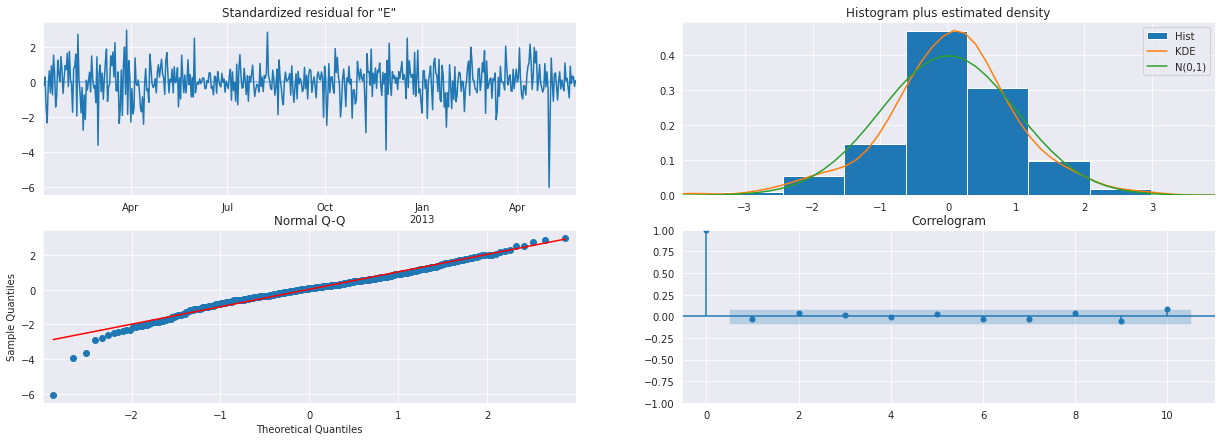

The ADF test statistic -22.944157    pvalue: 0.00   maximal Lag: 0   critical values: {'1%': -3.4434175660489905, '5%': -2.8673031724657454, '10%': -2.5698395516760275}
ADF: stationary
The KPSS test statistic 0.027113    pvalue: 0.10   maximal Lag: 3   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: stationary


/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


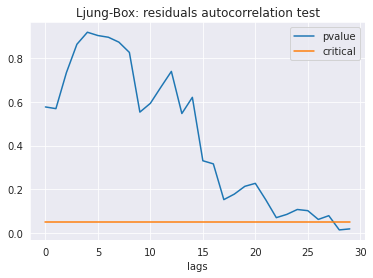

The Durbin-Watson residuals statistics 2.048968
Durbin-Watson: residuals are not correlated
The Wilcoxon residuals statistic 59837.000000, pvalue: 0.25
Wilcoxon: residuals are biased


In [26]:
model_plot_diagnostics(arima_best)
check_stationarity_dick_fuller(arima_best.resid)
check_stationarity_kpss(arima_best.resid)
check_resid_ljung_box(arima_best.resid)
check_resid_durbin_watson(arima_best.resid)
check_resid_wilcoxon(arima_best.resid)

### Conclusion:
1. The residuals are stationary destributed.
2. The residuals are not autocorrelated.
3. The residuals are not normally distributed (they are biased and Q-Q plot show deviations). But the histogramm is close to normal destribution.

7) Run analysis of the regression coafficients

In [27]:
arima_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -3808.151
Date:                   Sun, 22 Jan 2023   AIC                           7628.302
Time:                           18:28:18   BIC                           7653.638
Sample:                       01-09-2012   HQIC                          7638.240
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Saturday            19.4030    282.695      0.069      0.945    -534.669     573.475
Sunday            -188.1211     64.311     -2.925      0.003    -314.169     -62.074
Temp1_South_Less   -24.8493      5.767     -4.309      0.000     -36.153     -13.545
Temp1_South_Gr       0.9218     74.002      0.012      0.990    -144.119     145.963
ma.S.L7             -0.9995      1.432     -0.698      0.485      -3.807       1.808
sigma2            2.014e+05   2.87e+05      0.702      0.483   -3.61e+05    7.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               259.19
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.68
Prob(H) (two-sided):                  0.50   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

if there are some insignificant regressors that can be eliminated, please exclude them from the model
pValie > 0.5 for Saturday, Sunday. Temp1_South_Gr columns.

In [28]:
exogs = exogs.drop(columns=['Sunday', 'Saturday', 'Temp1_South_Gr'])

In [29]:
arima_best = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[0,0,1,7], exog=exogs).fit(disp=0)
arima_best.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -3811.539
Date:                   Sun, 22 Jan 2023   AIC                           7629.078
Time:                           18:28:19   BIC                           7641.746
Sample:                       01-09-2012   HQIC                          7634.047
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temp1_South_Less   -24.7334      5.663     -4.367      0.000     -35.833     -13.634
ma.S.L7             -0.9994      1.261     -0.792      0.428      -3.471       1.473
sigma2            2.045e+05   2.57e+05      0.797      0.425   -2.98e+05    7.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               365.26
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.77
Prob(H) (two-sided):                  0.71   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
ts_sdiff = dif_ts(ts, 365)
ts_sdiff_1 = ts_sdiff[:-len(ts2)]
endog = ts_sdiff_1['EnergyConsumption']
exogs = ts_sdiff_1[['Temp1_South_Less']]
arima_best = sm.tsa.SARIMAX(endog=endog, order=[0,1,0], seasonal_order=[0,1,1,7], exog=exogs).fit(disp=0)
arima_best.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                   EnergyConsumption   No. Observations:                  512
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -3810.948
Date:                             Sun, 22 Jan 2023   AIC                           7627.896
Time:                                     18:28:19   BIC                           7640.564
Sample:                                 01-01-2012   HQIC                          7632.865
                                      - 05-26-2013                                         
Covariance Type:                               opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temp1_South_Less   -25.0368      5.695     -4.396      0.000     -36.199     -13.874
ma.S.L7             -0.9994      1.255     -0.797      0.426      -3.458       1.460
sigma2             2.05e+05   2.56e+05      0.802      0.423   -2.96e+05    7.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               362.85
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.76
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Predict
ts_pred = arima_best.get_prediction()
ts_pred_ci = ts_pred.conf_int()

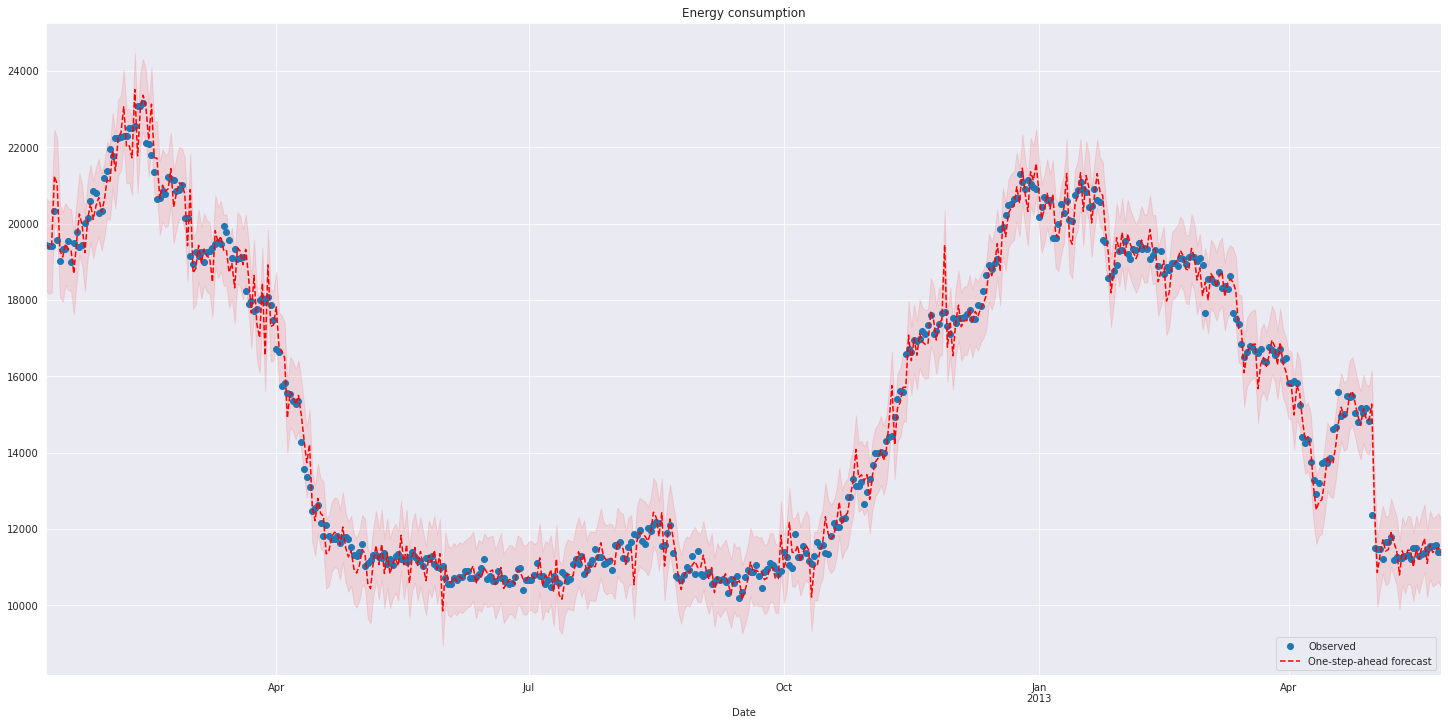

In [32]:
# Graph
fig, ax = plt.subplots(figsize=[25,12])
ax.set(title='Energy consumption', xlabel='Date')

start = '2012-01-09'
end = '2013-05-26'

# Plot data points
ts1.loc[start:end]['EnergyConsumption'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
ts_pred_int = ts_pred.predicted_mean + ts1.shift(365)['EnergyConsumption']
ts_pred_int[start:end].plot(ax=ax, style='r--', label='One-step-ahead forecast')

ci_low = (ts_pred_ci.loc[:,ts_pred_ci.columns[0]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ci_high = (ts_pred_ci.loc[:,ts_pred_ci.columns[1]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ax.fill_between(ci_low.index, ci_low, ci_high, color='r', alpha=0.1)

legend = ax.legend(loc='lower right')

In [33]:
def qualityMAPE(x, y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x - y).abs() / x.abs()).replace([np.inf, -np.inf], np.nan)
    return qlt.mean(), qlt

In [34]:
qualityMAPE(ts1['EnergyConsumption'], ts_pred_int)[0]

0.023086151519761025

8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data

In [35]:
# Build forecast
ts_sdiff_2 = ts_sdiff[-len(ts2):]
exogs = ts_sdiff_2[['Temp1_South_Less']]
ts_frc = arima_best.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


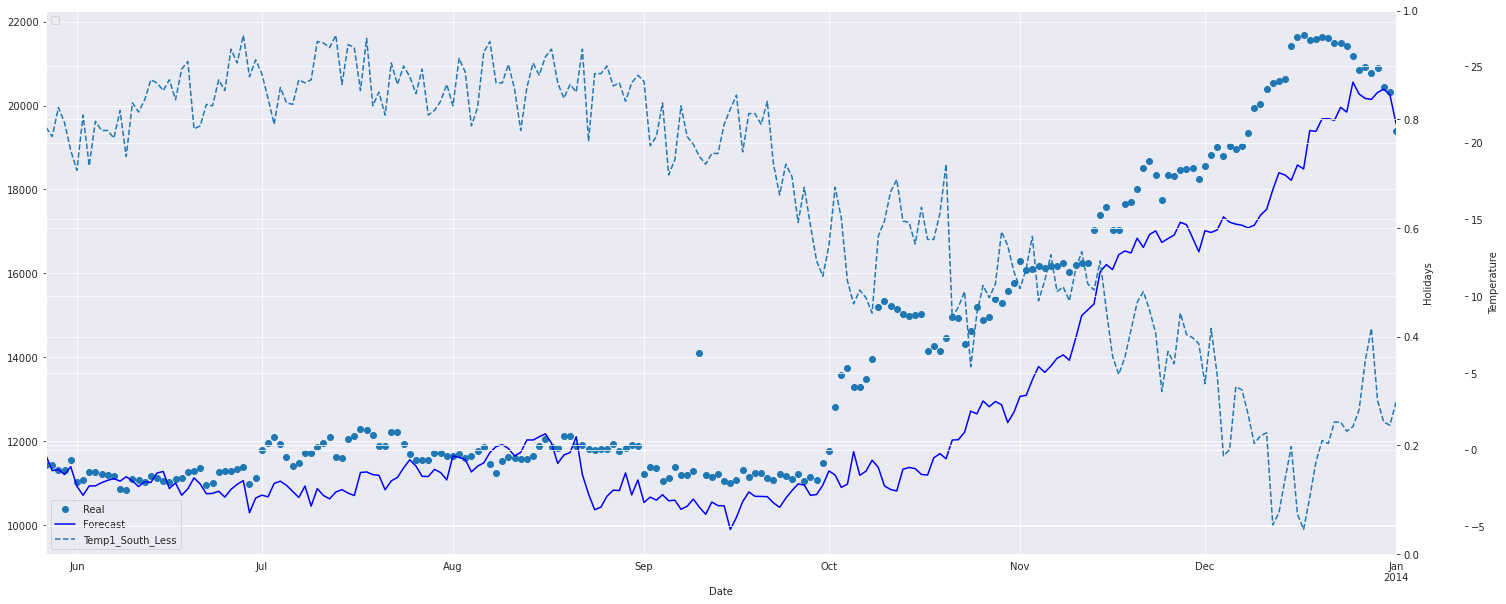

In [36]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts2['EnergyConsumption'].plot(ax = ax,  style='o', label='Real')
ts_frc_int.plot(ax = ax,  style='b-', label='Forecast')

for col in exogs.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts2[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left', ncol=1)
ax2.legend(loc='upper left')
plt.show()

9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [37]:
# MAPE for the whole forecasting period
qualityMAPE(ts2['EnergyConsumption'], ts_frc_int)[0]

0.08087809793382747

In [38]:
# MAPE for the first months of the forecasting period
qualityMAPE(ts2.loc[:'2013-06-26', 'EnergyConsumption'], ts_frc_int[:'2013-06-26'])[0]

0.01987284577695347

### Conclusion:
MAPE is rather high for the whole forecasting period (8%). But the forecast for the first month looks appropriate (MAPE = 2%)

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

0) define candidates for $p, d, q, P, D, Q$ values
1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?

In [39]:
ts_sdiff = dif_ts(ts, 365)
ts_sdiff_1 = ts_sdiff[:-len(ts2)]
endog = ts_sdiff_1['EnergyConsumption']
exogs = ts_sdiff_1[['Temp1_South_Less']]

In [40]:
from itertools import chain, combinations
def powerset(val):
    s = list(range(val+1))
    return list(chain.from_iterable(combinations(s, r) for r in range(1, val+2)))

In [ ]:
#pp, dd, qq, PP, DD, QQ=2, 3, 2, 3, 2, 1
pp, dd, qq, PP, DD, QQ=1, 2, 1, 1, 1, 1
grid = pd.DataFrame(columns=['Order','SeasonOrder','AIC','BIC','HQIC'])
for p in powerset(pp):
    for d in range(dd+1):
        for q in powerset(qq):
            for P in powerset(PP):
                for D in range(DD+1):
                    for Q in powerset(QQ):
                        order = [p,d,q]
                        seasonal_order = [P,D,Q,7]
                        try:
                            arima = sm.tsa.SARIMAX(endog=endog, order=order, seasonal_order=seasonal_order, exog=exogs).fit(disp=0)
                            grid.loc[len(grid)] = [order, seasonal_order, arima.aic, arima.bic, arima.hqic]
                        except Exception as e:
                            print(f'Error for order: {order}, seasonal_order: {seasonal_order}. Message: {e}')
                        #grid.loc[len(grid)] = [order, seasonal_order, 0, 0, 0]

In [42]:
grid.sort_values(by=['AIC'])

,Order,SeasonOrder,AIC,BIC,HQIC
70,"[(0,), 1, (0,)]","[(0, 1), 1, (1,), 7]",7627.604812,7644.495117,7634.230284
58,"[(0,), 1, (0,)]","[(0,), 1, (1,), 7]",7627.896073,7640.563802,7632.865177
142,"[(0,), 2, (1,)]","[(0, 1), 1, (1,), 7]",7627.916946,7649.019896,7636.195593
130,"[(0,), 2, (1,)]","[(0,), 1, (1,), 7]",7628.108543,7644.990904,7634.731461
392,"[(0, 1), 1, (0,)]","[(0, 1), 1, (1,), 7]",7628.833104,7649.945986,7637.114945
...,...,...,...,...,...
1,"[(0,), 0, (0,)]","[(0,), 0, (1,), 7]",8741.550615,8754.265589,8746.534885
14,"[(0,), 0, (0,)]","[(0, 1), 0, (0, 1), 7]",8822.754275,8839.707574,8829.399968
12,"[(0,), 0, (0,)]","[(0, 1), 0, (0,), 7]",8830.604555,8843.319529,8835.588825
2,"[(0,), 0, (0,)]","[(0,), 0, (0, 1), 7]",8843.238325,8855.953299,8848.222595


In [44]:
ar = sm.tsa.SARIMAX(endog=endog, order=[(0,),1,(0,)], seasonal_order=[(0,1),1,(1,),7], exog=exogs).fit(disp=0)
ar.summary()

/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                     EnergyConsumption   No. Observations:                  512
Model:             SARIMAX(0, 1, 0)x([2], 1, [1], 7)   Log Likelihood               -3809.802
Date:                               Sun, 22 Jan 2023   AIC                           7627.605
Time:                                       18:47:32   BIC                           7644.495
Sample:                                   01-01-2012   HQIC                          7634.230
                                        - 05-26-2013                                         
Covariance Type:                                 opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temp1_South_Less   -26.0965      5.881     -4.437      0.000     -37.623     -14.570
ar.S.L14            -0.0684      0.040     -1.716      0.086      -0.146       0.010
ma.S.L7             -0.9996      1.813     -0.551      0.581      -4.553       2.553
sigma2            2.032e+05   3.67e+05      0.554      0.580   -5.16e+05    9.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               335.78
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.73
Prob(H) (two-sided):                  0.65   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_best = ar

ARIMA(0,0,0)((0,1),1,1,7) has slightle better AIC but the additional AR seasonal component (0,1) has pValue > 0.05, so it is reasonable to exclude it from the model prameters. But the second-best model is the same as the one selected manually. Therefore in order to complete this task, ARIMA(0,0,0)((0,1),1,1,7) will still be analyzed.

2) Run Residuals and Coefficint analysis for the best model

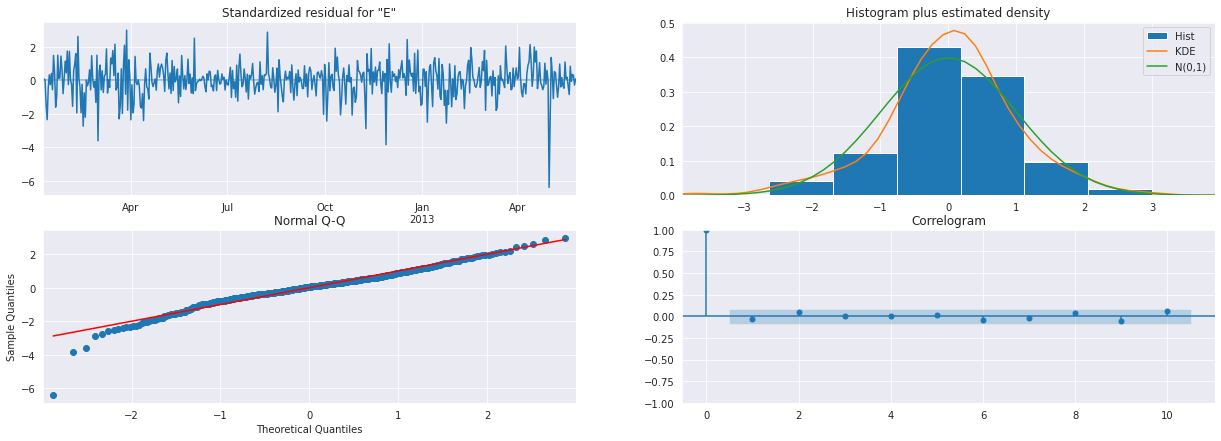

The ADF test statistic -23.874685    pvalue: 0.00   maximal Lag: 0   critical values: {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}
ADF: stationary
The KPSS test statistic 0.023345    pvalue: 0.10   maximal Lag: 2   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: stationary


/home/alexna/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


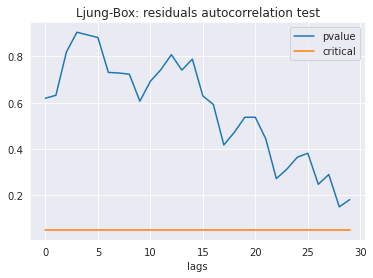

The Durbin-Watson residuals statistics 1.976521
Durbin-Watson: residuals are not correlated
The Wilcoxon residuals statistic 62230.000000, pvalue: 0.31
Wilcoxon: residuals are biased


In [45]:
model_plot_diagnostics(arima_best)
check_stationarity_dick_fuller(arima_best.resid)
check_stationarity_kpss(arima_best.resid)
check_resid_ljung_box(arima_best.resid)
check_resid_durbin_watson(arima_best.resid)
check_resid_wilcoxon(arima_best.resid)

### Conclusion:
The same as for the maually selected best model (0,0,0)(0,1,1,7)

1. The residuals are stationary destributed.
2. The residuals are not autocorrelated.
3. The residuals are not normally distributed (they are biased and Q-Q plot show deviations). But the histogramm is close to normal destribution.

3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data

In [46]:
# Build forecast
ts_sdiff_2 = ts_sdiff[-len(ts2):]
exogs = ts_sdiff_2[['Temp1_South_Less']]
ts_frc = arima_best.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


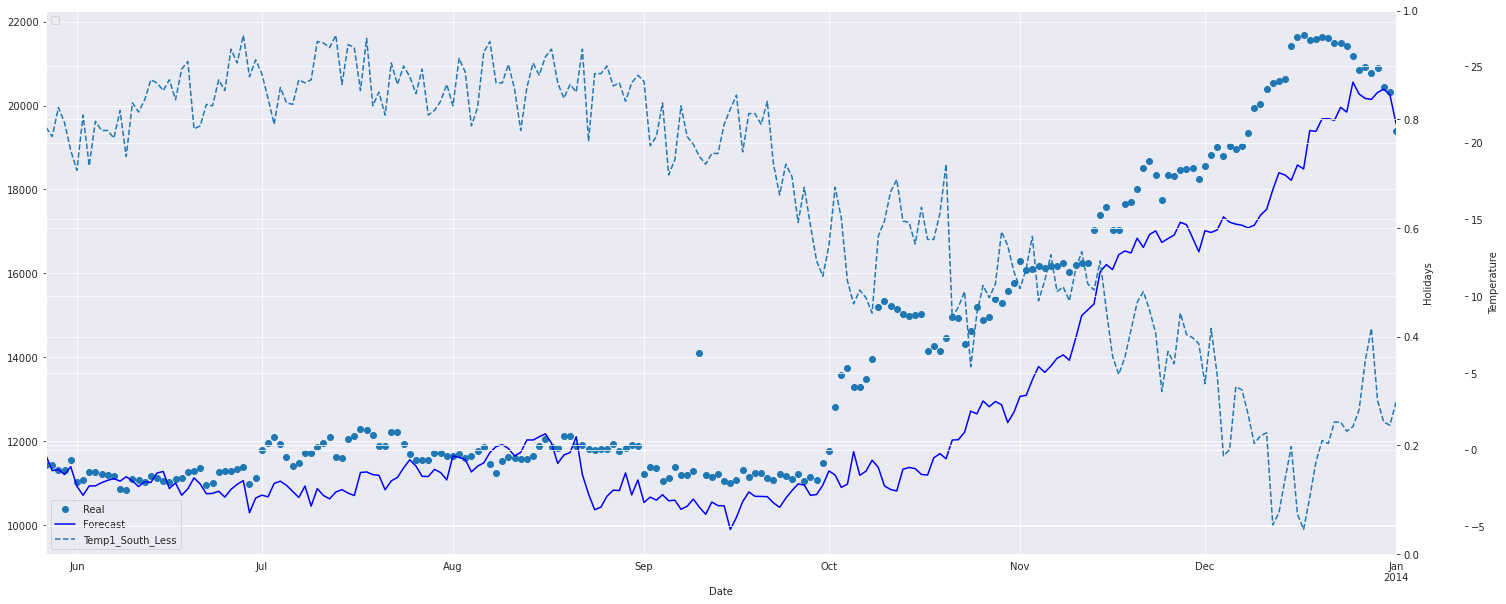

In [47]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30, 10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts2['EnergyConsumption'].plot(ax=ax, style='o', label='Real')
ts_frc_int.plot(ax=ax, style='b-', label='Forecast')

for col in exogs.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts2[col].plot(ax=ax3, style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left', ncol=1)
ax2.legend(loc='upper left')
plt.show()

4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [48]:
# MAPE for the whole forecasting period
qualityMAPE(ts2['EnergyConsumption'], ts_frc_int)[0]

0.08087809793382747

In [49]:
# MAPE for the first months of the forecasting period
qualityMAPE(ts2.loc[:'2013-06-26', 'EnergyConsumption'], ts_frc_int[:'2013-06-26'])[0]

0.01987284577695347

### Conclusion:
The same results as for the manually selected model.

MAPE is rather high for the whole forecasting period (8%). But the forecast for the first month looks appropriate (MAPE = 2%)

<h1 align="center"> Theoretical Bonus Part (Extra 50%)</h1>

<br></br>





**1. Let's consider simple AR model:** 
$$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$  

where 
  - $y_t$ is a stationary time series with zero average,
  - $\phi_1,\dots,\phi_p$ are constants ($\phi_q \neq 0$), $~~$
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$
<br></br>
Proof that partial autocorrelation coefficients depend on $p$ and $\tau$ only:
   $$rr_{\tau} = {\bf{E}}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau, p)>0 &, 1\leq\tau\leq p. \end{cases}$$

  where $\hat y_t$ - forecast of $y_t$ with following regression model $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
  $\hat y_{t+\tau}$ - forecast of $y_{t+\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<br></br>

<Answer>

$$r_{\tau} = \frac{cov(y_t-\hat y_t ; y_{t+\tau} - \hat y_{t+\tau})}{\sqrt{(VAR(y_t-\hat y_t)*VAR(y_{t+\tau} - \hat y_{t+\tau})}}$$
$$VAR(y_t-\hat y_t)=VAR(\phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \varepsilon_t - \beta_1 y_{t+1} - \dots - \beta_{\tau-1} y_{t+\tau -1})=VAR(\varepsilon_t) + \phi_1^2VAR(y_{t-1}) + \dots + \phi_p^2VAR(y_{t-p}) + \beta_1^2VAR(y_{t+1}) + \dots + \beta_{\tau-1}^2VAR(y_{t + \tau -1 }) =\sigma_\varepsilon^2 (1 + \Sigma_{i=1}^p{\phi_i^2}  + \Sigma_{j=1}^{\tau - 1}{\beta_j^2}) = f(\tau,p) $$
$$analogically \,\, VAR(y_{t+\tau} - \hat y_{t+\tau}) = ... = f(\tau,p) $$
$$cov(y_t-\hat y_t ; y_{t+\tau} - \hat y_{t+\tau}) = E[(y_t-\hat y_t)(y_{t+\tau} - \hat y_{t+\tau})]=E[(\phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \varepsilon_t - \Sigma_{j=1}^{\tau-1}\beta_j y_{t+j})(\phi_1 y_{t+\tau-1} + \dots + \phi_p y_{t+\tau-p} + \varepsilon_t - \Sigma_{j=1}^{\tau-1}\gamma_j y_{t+j})] $$
$E[y_i,y_j] = 0$ if $i\not=j$ and $E[y_i^2] = \sigma_\varepsilon^2 \; \therefore$
$$E[\phi_i y_{t-i} \phi_j y_{t+\tau-j}] \not=0 \; for \, t-i=t+\tau-j \; \therefore \, \tau=j-i \; where \, j \, \in [1;\tau-1], \, i \, \in [1;p]   \; \therefore \, max(j) = \tau - 1 = p, \, min(j)=\tau - 1=1 \; \therefore \, \tau \, \in [2;p+1] $$


something went wrong...




**2. Let's consider simple MA model:**
  $$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$
  where
  - $y_t$ is a stationary time series with zero average,$~~$
  - $\theta_1,\dots,\theta_q$ are constants ($\theta_q \neq 0$),$~~$
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$


Proof that the correlation coefficients depend on $\tau$ and $q$
$$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$

<br></br>

<Answer>

$$r_{\tau} = \frac{cov(x_t; x_{t-\tau})}{\sqrt{(VAR(x_t)*VAR(x_{t-\tau})}}$$
$$VAR(x_t)=VAR(\varepsilon_t + \theta_1\varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q})=VAR(\varepsilon_t) + \theta_1^2VAR(\varepsilon_{t-1}) + \dots=\sigma_\varepsilon^2 (1 + \theta_1^2 + \dots + \theta_q^2) = VAR(x_{t-\tau)$$
$$cov(x_t; x_{t-\tau})=E[(y_t-\mu)(y_{t-\tau}-\mu]=E[y_t y_{t-\tau}] = E[(\varepsilon_t + \theta_1\varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q})(\varepsilon_{t-\tau} + \theta_1\varepsilon_{t-\tau-1} + \dots + \theta_q \varepsilon_{t-\tau-q})] = E[\varepsilon_t \varepsilon_{t-\tau} + \dots + \theta_i \varepsilon_{t-i} \theta_j\varepsilon_{t-\tau-j} + \dots]$$

$E[y_i,y_j] = 0$ if $i\not=j$ and $E[y_i^2] = \sigma_\varepsilon^2 \; \therefore$
$$E[\theta_i \varepsilon_{t-i} \theta_j\varepsilon_{t-\tau-j}] \not=0 \; for \, t-i=t-\tau-j \; \therefore \, \tau=i-j <= i \; where \, i \, \in [0;q]  \; \therefore \, \tau \, \in [0;q]$$

$$r_{\tau} = \frac{\sigma_\varepsilon^2 \Sigma_{i=0}^q{\theta_i \theta_{i-\tau}}}{\sigma_\varepsilon^2 (1 + \theta_1^2 + \dots + \theta_q^2)} = f(\tau,q) \, where  \, \tau \, \in [0;q]$$



**3. How to select candiates for $p$ and $q$ parameters for simple ARMA model based on ACF and PACF.**

1. If PACF continuously declines or oscillates to zero, then q (number of steps back for Moving Average regression) = quantity of spikes above the level of significance on ACF plot.
2. If ACF continuously declines or oscillates to zero, then p (number of steps back for Autoregression) = quantity of spikes above the level of significance on PACF plot.
3. Both ACF and PACF gradually declines or oscillates to zero with several spikes on both plots. Then it is not obvious if AR or MA causes this behavior, therefore different combinations of p and q should be tested. p and q should be selected by the quantity of spikes on the according plots (PACF for AR component and ACF for MA component).

<h1 align="center"> Practical Bonus Part (Extra 50%)</h1>

Realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.academia.edu/23049010/Time_series_analysis_supported_by_power_transformations">here</a>.  

You need to replace all 'TODO' below by some code:

In [103]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=(x - x.shift(self.shift)).iloc[self.shift:]
            
        if self.lmbda is None:
            self.lmbda = self.optimal_lambda(x,n)

        if self.lmbda == 0:
            self.y = np.array([math.log(v) for v in x])
        else:
            self.y = np.array([(v**self.lmbda - 1)/self.lmbda for v in x])
        return self.y, self.lmbda
        
    def optimal_lambda(self,x : pd.DataFrame, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
               
        sigma = np.empty([n])
        m = np.empty([2, n])
        m[0] = np.ones(n)
        r = len(x)//n  # the length of each subseries

        for i in range(n):
            m[1][i] = math.log(np.mean(x[i*r:(i+1)*r]))
            sigma[i] = math.log(np.std(x[i*r:(i+1)*r]))

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(m,m.T)),np.dot(m,sigma))
        print(f'w: {w}')
        self.lmbda = 1 - w[1]

        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y

        if self.lmbda == 0:
            x = np.array([math.exp(v) for v in y])
        else:
            x = np.array([math.pow(self.lmbda * v + 1, 1.0/self.lmbda) for v in y])
        return x

In [51]:
# Check on Wage data
# boxcox transformation for wage dataset 
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

In [104]:
bc = boxcox()
lmbda = bc.optimal_lambda(ts_wage['Real wage'], n=18)
lmbda

w: [-1.90385968  0.90481966]


0.0951803355125449

<AxesSubplot:xlabel='Month'>

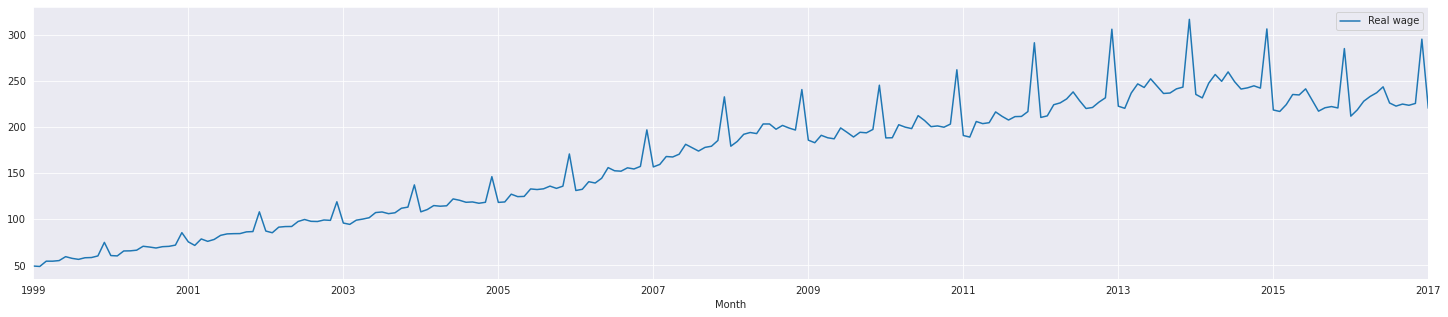

In [93]:
# cut first steps
ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5))

w: [-1.90385968  0.90481966]
lambda= 0.0951803355125449


/tmp/ipykernel_149124/1643714613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)


<AxesSubplot:xlabel='Month'>

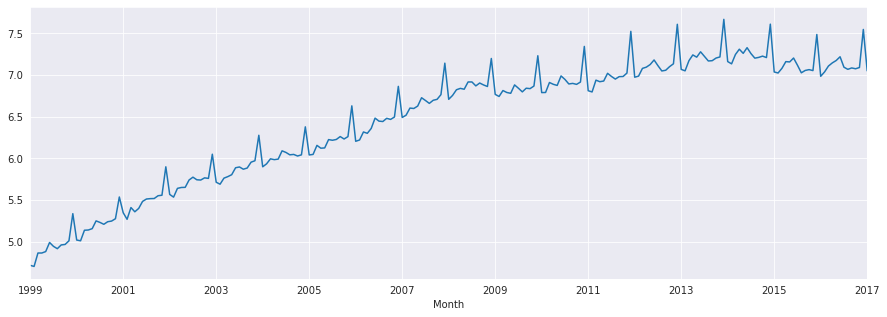

In [106]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print ('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))